# Prova 2 - Estatística

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy.special as scisp
import seaborn as sns
import math
#!pip install prettytable
from prettytable import PrettyTable
from sklearn.utils import resample
%matplotlib inline


## Questão 1.3

(array([0.00000000e+00, 8.52413094e-13, 3.98325402e-10, 1.39627275e-08,
        1.69400380e-07, 1.14861861e-06, 5.38821972e-06, 1.95957666e-05,
        5.91335143e-05, 1.54699346e-04, 3.61506363e-04, 7.70863686e-04,
        1.52373213e-03, 2.82550972e-03, 4.96102874e-03, 8.30854591e-03,
        1.33513991e-02, 2.06859983e-02, 3.10249134e-02, 4.51940164e-02,
        6.41229073e-02, 8.88281946e-02, 1.20389584e-01, 1.59919127e-01,
        2.08524394e-01, 2.67266674e-01, 3.37115693e-01, 4.18902526e-01,
        5.13272635e-01, 6.20641026e-01, 7.41151537e-01, 8.74642189e-01,
        1.02061837e+00, 1.17823534e+00, 1.34629128e+00, 1.52323170e+00,
        1.70716553e+00, 1.89589300e+00, 2.08694467e+00, 2.27763086e+00,
        2.46509997e+00, 2.64640419e+00, 2.81857059e+00, 2.97867529e+00,
        3.12391848e+00, 3.25169790e+00, 3.35967822e+00, 3.44585429e+00,
        3.50860590e+00, 3.54674256e+00, 3.55953640e+00, 3.54674256e+00,
        3.50860590e+00, 3.44585429e+00, 3.35967822e+00, 3.251697

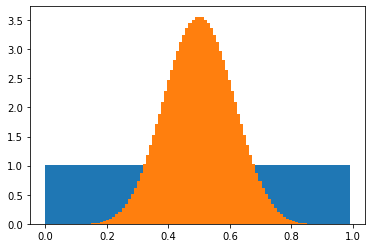

In [2]:
y = np.arange(0,1,0.01)
py_11 = np.arange(1,1,0.01)
py_inf = math.factorial(20)/math.factorial(10)/math.factorial(10)*(y**9)*((1-y)**9)
#print(py_inf)
#plt.plot(y,py_inf)
plt.hist(y, density=1, bins=100)
plt.hist(y, weights=py_inf, density=1, bins=100)

Nota-se que quando p e q vão para o infinito, a distribuição tende a uma gaussiana

## Questão 3.1

In [3]:
# Importação dos dados
df = pd.read_csv('petroleo.csv')
print(df)


    conversao  10 pts ATSM  G1  G2  G3  G4  G5  G6  G7  G8  G9  temp_gas
0       0.122          190   1   0   0   0   0   0   0   0   0       205
1       0.223          190   1   0   0   0   0   0   0   0   0       275
2       0.347          190   1   0   0   0   0   0   0   0   0       345
3       0.457          190   1   0   0   0   0   0   0   0   0       407
4       0.080          210   0   1   0   0   0   0   0   0   0       218
5       0.131          210   0   1   0   0   0   0   0   0   0       273
6       0.266          210   0   1   0   0   0   0   0   0   0       347
7       0.074          217   0   0   1   0   0   0   0   0   0       212
8       0.182          217   0   0   1   0   0   0   0   0   0       272
9       0.304          217   0   0   1   0   0   0   0   0   0       340
10      0.069          220   0   0   0   1   0   0   0   0   0       235
11      0.152          220   0   0   0   1   0   0   0   0   0       300
12      0.260          220   0   0   0   1   0   0 

In [4]:
# Construção da matriz X:
#X = df['G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'temp_gas']
X = df.drop(['conversao', '10 pts ATSM'], 1)
X = np.concatenate((np.ones((32,1)), X), axis=1)
print(X)


[[  1.   1.   0.   0.   0.   0.   0.   0.   0.   0. 205.]
 [  1.   1.   0.   0.   0.   0.   0.   0.   0.   0. 275.]
 [  1.   1.   0.   0.   0.   0.   0.   0.   0.   0. 345.]
 [  1.   1.   0.   0.   0.   0.   0.   0.   0.   0. 407.]
 [  1.   0.   1.   0.   0.   0.   0.   0.   0.   0. 218.]
 [  1.   0.   1.   0.   0.   0.   0.   0.   0.   0. 273.]
 [  1.   0.   1.   0.   0.   0.   0.   0.   0.   0. 347.]
 [  1.   0.   0.   1.   0.   0.   0.   0.   0.   0. 212.]
 [  1.   0.   0.   1.   0.   0.   0.   0.   0.   0. 272.]
 [  1.   0.   0.   1.   0.   0.   0.   0.   0.   0. 340.]
 [  1.   0.   0.   0.   1.   0.   0.   0.   0.   0. 235.]
 [  1.   0.   0.   0.   1.   0.   0.   0.   0.   0. 300.]
 [  1.   0.   0.   0.   1.   0.   0.   0.   0.   0. 365.]
 [  1.   0.   0.   0.   1.   0.   0.   0.   0.   0. 410.]
 [  1.   0.   0.   0.   0.   1.   0.   0.   0.   0. 307.]
 [  1.   0.   0.   0.   0.   1.   0.   0.   0.   0. 367.]
 [  1.   0.   0.   0.   0.   1.   0.   0.   0.   0. 395.]
 [  1.   0.   

In [5]:
y = np.array(df['conversao'])
ye = np.log(y)/np.log(1-y)
print(y)
print(ye)


[0.122 0.223 0.347 0.457 0.08  0.131 0.266 0.074 0.182 0.304 0.069 0.152
 0.26  0.336 0.144 0.268 0.349 0.1   0.248 0.317 0.028 0.064 0.161 0.278
 0.05  0.176 0.321 0.14  0.232 0.085 0.147 0.18 ]
[ 16.16905304   5.94726406   2.48354004   1.28236645  30.29119582
  14.47565543   4.28221512  33.86647786   8.48087828   3.28562118
  37.39578033  11.42610362   4.47376574   2.66353038  12.46385947
   4.22075259   2.45240316  21.85434533   4.89204843   3.01330389
 125.90200449  41.56154224  10.40391559   3.93004517  58.40397481
   8.97421565   2.93519482  13.03590496   5.53488109  27.750426
  12.05895702   8.6409187 ]


In [6]:
# Criação das Funções utilizadas:
# gera parâmetros (ue=u*, T, W, c, d) e U(b,f) e K(b,f), dados os valores de beta e gamma do passo atual:
def gera_U_K(bf):
    b = bf[:-1]
    f = bf[-1]
    # parâmetros e cálculo de U
    nlinhas = np.size(X,0) # 32
    ncolunas = np.size(X,1) # 11
    u = [float(np.exp(X[i]@b)/(1+np.exp(X[i]@b))) for i in range(nlinhas)]
    ue = [float(scisp.digamma(u[i]*f)-scisp.digamma((1-u[i])*f)) for i in range(nlinhas)]
    T = [u[i]*(1-u[i]) for i in range(nlinhas)]
    T = np.diag(T)
    Ub = f*X.T@T@(ye-ue)
    Uf = u*(ye-ue)+np.log(1-y)-[float(scisp.digamma((1-u[i])*f)) for i in range(nlinhas)]+scisp.digamma(f)
    Uf = Uf.sum()
    U = np.concatenate((np.reshape(Ub, (ncolunas,1)), np.reshape(Uf, (1,1))), axis=0)
    # parâmetros e cálculo de K
    W = [float(f*(scisp.polygamma(1, u[i]*f) + scisp.polygamma(1, (1-u[i])*f))*(u[i]*(1-u[i]))**2) for i in range(nlinhas)]
    W = np.diag(W)
    c = [float(f*(scisp.polygamma(1, u[i]*f)*u[i] - scisp.polygamma(1, (1-u[i])*f)*(1-u[i]))) for i in range(nlinhas)]
    D = [float((scisp.polygamma(1, u[i]*f)*u[i]**2 + scisp.polygamma(1, (1-u[i])*f)*(1-u[i])**2 - scisp.polygamma(1, f))) for i in range(nlinhas)]
    D = np.diag(D)
    kbb = f*X.T@W@X
    kbf = X.T@T@c
    kff = np.trace(D)
    k1 = np.concatenate((kbb, np.reshape(kbf, (ncolunas,1))), axis=1)
    k2 = np.concatenate((np.reshape(kbf, (1,ncolunas)), np.reshape(kff, (1,1))), axis=1)
    K = np.concatenate((k1, k2), axis=0)
    
    return U, K


In [7]:
# Chute inicial de beta e gamma:
beta0 = np.ones((11,1))*0/11
#beta0 = np.reshape(np.linalg.pinv(X)@ye, (np.shape(X)[1],1))
beta0[0] = 1
phi0 = 1/2
print(f'beta0 = {beta0}')
print(f'phi0 = {phi0}')


beta0 = [[1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
phi0 = 0.5


In [128]:
# Processo iterativo:
beta_phi = np.concatenate((beta0, np.reshape(phi0, (1,1))), axis=0)
n_iter = 0
eps1 = 1
eps2 = 1
U = 0
rp = 0.127 # redutor de passo: devido a problemas de convergência e imprecisão numérica, este redutor ajudou no processo iterativo
while (eps1 >= 0.01) and (eps2 >= 0.000001) and (n_iter <= 100):
    new_U, K = gera_U_K(beta_phi)
    new_beta_phi = beta_phi + np.linalg.inv(K)@(new_U-U)*rp # utilização de redutor de passo
    eps1 = np.linalg.norm(new_U)
    eps2 = np.linalg.norm(new_beta_phi-beta_phi)
    n_iter += 1
    beta_phi = new_beta_phi
    U = new_U
    print(f'n_iter = {n_iter}')
    print(f'eps1 = {eps1}')
    print(f'eps2 = {eps2}')
    #print(f'U = {U}')
    #print(f'K = {K}')
    print(f'beta_phi = {beta_phi}')


n_iter = 1
eps1 = 9750.712546818802
eps2 = 3.671083975754012
beta_phi = [[ 4.35690701]
 [-0.61179766]
 [-0.56177465]
 [-0.60804353]
 [-0.36376665]
 [-0.36801059]
 [-0.36562311]
 [ 0.22636744]
 [ 0.01224121]
 [-0.15206976]
 [-0.00508139]
 [ 1.32002897]]
n_iter = 2
eps1 = 2309.6781700879174
eps2 = 1.7635608175111794
beta_phi = [[ 5.03959713e+00]
 [-5.77917106e-01]
 [-4.86360686e-01]
 [-5.33906110e-01]
 [-3.48073774e-01]
 [-3.57536693e-01]
 [-3.49630924e-01]
 [ 1.54057189e-02]
 [-4.63556697e-02]
 [-1.55715164e-01]
 [-4.20108907e-03]
 [ 2.92725802e+00]]
n_iter = 3
eps1 = 537.0545628930898
eps2 = 0.5732660163520157
beta_phi = [[ 5.24869612e+00]
 [-5.88323892e-01]
 [-5.05821108e-01]
 [-5.52324018e-01]
 [-3.51981216e-01]
 [-3.57661347e-01]
 [-3.52176364e-01]
 [ 7.32467609e-02]
 [-3.34692285e-02]
 [-1.51385819e-01]
 [-4.42620523e-03]
 [ 3.45691178e+00]]
n_iter = 4
eps1 = 539.6142798246417
eps2 = 0.0369998879193738
beta_phi = [[ 5.26460522e+00]
 [-5.97407921e-01]
 [-5.09478473e-01]
 [-5.5738115

In [129]:
beta_phi_total = beta_phi

## Questão 3.2

In [130]:
#print(beta_phi[:-1])
beta_est = beta_phi[:-1] # eliminando phi da coluna de estatísticas
# Pelo resultado do item 2.1.5, a convergência das variâncias se dá para os valores da diagonal da inversa da matriz K
# Deste modo, os erros-padrão são dados abaixo:
std = np.reshape(np.diag(np.linalg.inv(K))[:-1]**0.5, (len(beta_est),1))
#print(std)
pd.DataFrame(np.concatenate((beta_est, std, beta_est/std), axis=1), columns = ['Beta', 'std_error', 't_stat'])


,Beta,std_error,t_stat
0,5.265759,1.447409,3.638060
1,-0.596955,0.822421,-0.725851
2,-0.509685,0.902727,-0.564605
3,-0.557427,0.908567,-0.613524
4,-0.357689,0.804466,-0.444629
5,-0.364299,0.841258,-0.433041
6,-0.358149,0.847280,-0.422705
7,0.057023,0.807818,0.070589
8,-0.038231,0.836813,-0.045687
9,-0.155263,0.932579,-0.166487


## Questão 3.3

In [131]:
boot = np.random.normal(loc=beta_est, scale=std, size=(11,1000))
#print(np.mean(boot, axis=1))
#print(np.sort(boot)[:,949])
#print(np.mean(boot, axis=1).shape)
conf_int = pd.DataFrame(np.reshape(np.concatenate((np.sort(boot)[:,49], np.mean(boot, axis=1), np.sort(boot)[:,949]), axis=0), (len(beta_est),3), order='F'), columns = ['lower', 'beta_mean', 'upper'])
print(conf_int)


       lower  beta_mean     upper
0   2.877446   5.328507  7.803811
1  -2.004212  -0.633636  0.737655
2  -2.101549  -0.536753  0.888535
3  -2.000224  -0.542910  0.953405
4  -1.717498  -0.331935  0.984960
5  -1.702675  -0.326273  1.015148
6  -1.802611  -0.363500  1.020178
7  -1.347509   0.070366  1.498166
8  -1.442839  -0.065252  1.372727
9  -1.585877  -0.094675  1.419914
10 -0.009610  -0.004404  0.000876


## Questão 3.4

In [132]:
# Se todos os valores de beta (2 a 11) são 0, e beta1 = 1, a otimização se dá apenas em relação a phi
# Assim, podemos adaptar as funções para a otimização anterior:
# gera parâmetros restrito:
def gera_U_K_restrito(bf):
    b = bf[:-1]
    f = bf[-1]
    # parâmetros e cálculo de U
    nlinhas = np.size(X,0) # 32
    ncolunas = np.size(X,1) # 11
    u = [float(np.exp(X[i]@b)/(1+np.exp(X[i]@b))) for i in range(nlinhas)]
    ue = [float(scisp.digamma(u[i]*f)-scisp.digamma((1-u[i])*f)) for i in range(nlinhas)]
    T = [u[i]*(1-u[i]) for i in range(nlinhas)]
    T = np.diag(T)
    #Ub = f*X.T@T@(ye-ue)
    Uf = u*(ye-ue)+np.log(1-y)-[float(scisp.digamma((1-u[i])*f)) for i in range(nlinhas)]+scisp.digamma(f)
    Uf = Uf.sum()
    #U = np.concatenate((np.reshape(Ub, (ncolunas,1)), np.reshape(Uf, (1,1))), axis=0)
    # parâmetros e cálculo de K
    #W = [float(f*(scisp.polygamma(1, u[i]*f) + scisp.polygamma(1, (1-u[i])*f))*(u[i]*(1-u[i]))**2) for i in range(nlinhas)]
    #W = np.diag(W)
    #c = [float(f*(scisp.polygamma(1, u[i]*f)*u[i] - scisp.polygamma(1, (1-u[i])*f)*(1-u[i]))) for i in range(nlinhas)]
    D = [float((scisp.polygamma(1, u[i]*f)*u[i]**2 + scisp.polygamma(1, (1-u[i])*f)*(1-u[i])**2 - scisp.polygamma(1, f))) for i in range(nlinhas)]
    D = np.diag(D)
    #kbb = f*X.T@W@X
    #kbf = X.T@T@c
    kff = np.trace(D)
    #k1 = np.concatenate((kbb, np.reshape(kbf, (ncolunas,1))), axis=1)
    #k2 = np.concatenate((np.reshape(kbf, (1,ncolunas)), np.reshape(kff, (1,1))), axis=1)
    #K = np.concatenate((k1, k2), axis=0)
    
    return Uf, kff


In [133]:
beta_phi = np.concatenate((beta0, np.reshape(phi0, (1,1))), axis=0)
n_iter = 0
eps1 = 1
eps2 = 1
U = 0
rp = 0.127 # redutor de passo: devido a problemas de convergência e imprecisão numérica, este redutor ajudou no processo iterativo
while (eps1 >= 0.01) and (eps2 >= 0.000001) and (n_iter <= 100):
    new_U, K = gera_U_K_restrito(beta_phi)
    new_beta_phi = beta_phi
    new_beta_phi[11] = beta_phi[11] + (1/K)*(new_U-U)*rp # utilização de redutor de passo
    eps1 = abs(new_U)
    eps2 = np.linalg.norm(new_beta_phi-beta_phi)
    n_iter += 1
    beta_phi = new_beta_phi
    U = new_U
    print(f'n_iter = {n_iter}')
    print(f'eps1 = {eps1}')
    print(f'eps2 = {eps2}')
    #print(f'U = {U}')
    #print(f'K = {K}')
    print(f'beta_phi = {beta_phi}')


n_iter = 1
eps1 = 461.4784047648192
eps2 = 0.0
beta_phi = [[1.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.99085486]]


In [139]:
beta_phi_restrito = beta_phi
phi_restrito = beta_phi_restrito[11]
phi_total = beta_phi_total[11]
u_total = [float(np.exp(X[i]@beta_phi_total[:-1])/(1+np.exp(X[i]@beta_phi_total[:-1]))) for i in range(11)]
u_restrito = [float(np.exp(X[i]@beta_phi_restrito[:-1])/(1+np.exp(X[i]@beta_phi_restrito[:-1]))) for i in range(11)]


In [146]:
# pelo item anterior, encontramos o novo valor dos parâmetros beta_phi otimizados apenas em phi
# Calculamos então a Máxima Verossimilhança
l_total = np.array([np.log(scisp.gamma(phi_total)) - np.log(scisp.gamma(phi_total*u_total[i])) - np.log(scisp.gamma(phi_total*(1-u_total[i]))) + (u_total[i]*phi_total-1)*np.log(y[i]) + ((1-u_total[i])*phi_total-1)*np.log(1-y[i])  for i in range(11)]).sum()
l_restrito = np.array([np.log(scisp.gamma(phi_restrito)) - np.log(scisp.gamma(phi_restrito*u_restrito[i])) - np.log(scisp.gamma(phi_restrito*(1-u_restrito[i]))) + (u_restrito[i]*phi_restrito-1)*np.log(y[i]) + ((1-u_restrito[i])*phi_restrito-1)*np.log(1-y[i])  for i in range(11)]).sum()
w1 = -2*(l_total - l_restrito)
new_w1 = w1**0.5
print(f'new_w1 = {new_w1}')

# O intervalo de confiança se dá então como uma chi-quadrado em torno do valor centrado em 1
# Como se trata de apenas uma variável, tomando a raíz, podemos tomar o intervalo em torno de uma normal
# O valor inverso da função acumulada normal para 95% de confiança sendo dado por 1.96 desvios em relação a 0

# A estatística de LM, como mostrado no item 2.1.3, uma vez que a restrição só recai sobre phi (unidimensional), fica:
w3 = U**2/K/32 # possui distribuição chi-quadrado

# De modo similar ao anterior, podemos tomar uma nova estatística (raíz), com os valores do intervalo de confiança sendo dados também por 1.96 desvios em relação a 0
new_w3 = U/(K*32)**0.5
print(f'new_w3 = {new_w3}')

# O desvio-padrão dos modelos restritos é dada por:
print(f'Desvio = {1/K**0.5}')

# O limite máxio superior (95%) é dado por:
print(f'var = {phi_total + 1.96/K**0.5}')

# Percebemos assim, que os valores das estatíticas não estão condizentes com a hipótese inicial e devem ser rejeitadas
print('Hipótese rejeitada')

new_w1 = 10.800236614068123
new_w3 = 7.465783477319549
Desvio = 0.09151641453512435
var = [3.65778428]
Hipótese rejeitada


## Questão 3.5

In [ ]:
# (tempo...)

In [72]:
# Código fornecido em aula e adaptado
# Create one bootstrap subsample from X size n
def bootstrap_resample(X,n=None):
    # X - original dataset list of nparrays of a nparray
    # n - size of bootstrap sample, n=len(X) if none
    if type(X) == list:
        T = []
        for Z in X:
            if n == None:
                n = Z.shape[0]
            i = np.random.randint(0,len(Z),n)
            T.append(Z[i])
        return T
    if n == None:
        n = X.shape[0]
    i = np.random.randint(0,len(X),n)
    return X[i]

# calculate boostrap distribution of some arbitraty function of the sample
def bootstrap_stat(X,Z,fcn,n=None):
    # X - original dataset
    # Z - vector to store bootstrap samples kxm
    # fcn - statistics 
    # n - size of bootstrap sample, n=len(X) if None  
    k = len(fcn)
    m = Z.shape[1]
    for i in range(0,m):
        s = bootstrap_resample(X,n)
        for j in range(0,k):
            Z[j,i] = fcn[j](s)
            

Estatística t = 1.746


Text(0.5, 1.0, 'Bootstrap dist. of t')

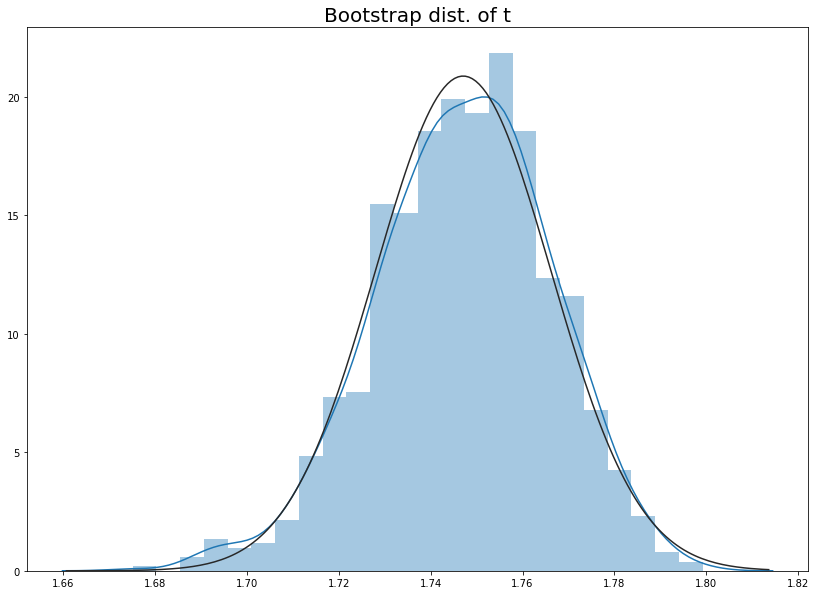

In [76]:
# Código fornecido em aula e adaptado
Y = beta_est
# calcula estatística t baseada em duas amostras
def two_sample_t(Z):
    X = Z[0]
    Y = Z[1]
    d = X.mean()-Y.mean()
    s = X.var()/len(X) + Y.var()/len(Y)
    return d/np.sqrt(s)

print('Estatística t = {:.3f}'.format(two_sample_t([X,Y])))

m = 1000
T = np.zeros([1,m])
bootstrap_stat([X,Y], T, [two_sample_t])

plt.figure(figsize=(14,10))
sns.distplot(T[0],bins='fd', fit=stats.t)
plt.title(u'Bootstrap dist. of t', fontsize=20)

Treatment X -- Mean = 30.364	 s.e. = 97.636
Treatment Y -- Mean = 0.216	 s.e. = 1.611


Text(0.5, 1.0, 'Bootstrap dist. of std of Y')

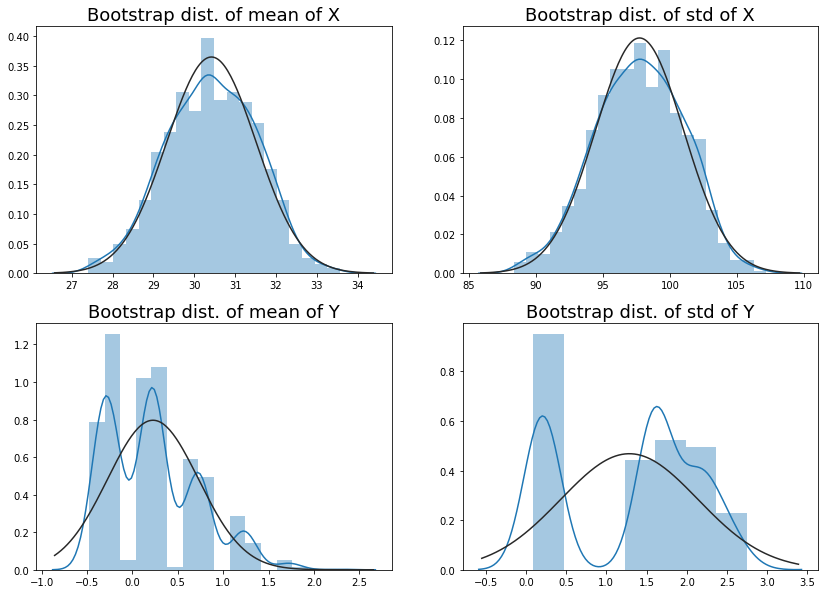

In [77]:
# Código fornecido em aula e adaptado
# Cálculo das estatísticas
print("Treatment X -- Mean = {0:.3f}\t s.e. = {1:.3f}".format(X.mean(),X.std()))
print("Treatment Y -- Mean = {0:.3f}\t s.e. = {1:.3f}".format(Y.mean(),Y.std()))

# bootstrap sample
stats_list = [np.mean, np.std]
m = 1000
Zx = np.zeros([len(stats_list),m])
Zy = np.zeros([len(stats_list),m])

bootstrap_stat(X, Zx, stats_list)
bootstrap_stat(Y, Zy, stats_list)

fig, ax = plt.subplots(2, 2, figsize=(14,10))
sns.distplot(Zx[0],bins='fd', fit=stats.norm,ax=ax[0,0])
ax[0,0].set_title(u'Bootstrap dist. of mean of X', fontsize=18)
sns.distplot(Zx[1],bins='fd', fit=stats.norm, ax=ax[0,1])
ax[0,1].set_title(u'Bootstrap dist. of std of X', fontsize=18)
sns.distplot(Zy[0],bins='fd', fit=stats.norm, ax=ax[1,0])
ax[1,0].set_title(u'Bootstrap dist. of mean of Y', fontsize=18)
sns.distplot(Zy[1],bins='fd', fit=stats.norm, ax=ax[1,1])
ax[1,1].set_title(u'Bootstrap dist. of std of Y', fontsize=18)